# 6.11 Preprocess 49-00035 (Oakland, CA)

In [1]:
import pandas

from cpe_help import Department

In [6]:
dept = Department('49-00035')
path = dept.tabular_input_dir / '49-00035_Incidents_2016.csv'
df = pandas.read_csv(path, low_memory=False, skiprows=[1])

df.tail().T

,10764,10765,10766,10767,10768
CRIME_TYPE,BURG - AUTO,VANDALISM,STOLEN VEHICLE,STOLEN VEHICLE,STOLEN VEHICLE
INCIDENT_DATE,1/19/17 19:00,12/22/16 11:55,1/19/17 15:00,1/20/17 9:19,1/19/17 3:00
INCIDENT_UNIQUE_IDENTIFIER,17-003513,16-917612,17-003518,17-003520,17-003521
INCIDENT_REASON,BURGLARY-AUTO,VANDALISM,VEHICLE THEFT - AUTO,POSS STOLEN VEH/VES/ETC,VEHICLE THEFT - AUTO
LOCATION_DISTRICT,04X,77X,32Y,07X,03Y
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,1700 MARTIN LUTHER KING JR W,SAN PABLO AVE,9800 SUNNYSIDE ST,2200 CAMPBELL ST,600 10TH ST
LOCATION_CITY,Oakland,Oakland,Oakland,Oakland,Oakland
LOCATION_STATE,CA,CA,CA,CA,CA


In [5]:
df.shape

(10769, 8)

# Date

In [7]:
date = df['INCIDENT_DATE']
datef = pandas.to_datetime(date, format='%m/%d/%y %H:%M')

In [8]:
datef.describe()

count                   10767
unique                   7651
top       2016-11-22 20:00:00
freq                       10
first     2004-08-08 00:00:00
last      2050-01-03 13:55:00
Name: INCIDENT_DATE, dtype: object

In [11]:
datef.dt.year.value_counts()

2016.0    6110
2017.0    4646
2040.0       2
2030.0       2
2019.0       2
2014.0       1
2004.0       1
2034.0       1
2050.0       1
2020.0       1
Name: INCIDENT_DATE, dtype: int64

In [12]:
df[datef.dt.year == 2050]

,CRIME_TYPE,INCIDENT_DATE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_REASON,LOCATION_DISTRICT,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE
8864,BURG - AUTO,1/3/50 13:55,14-038177,BURGLARY-AUTO,08X,TELEGRAPH AV & W MACARTHUR BLVD,Oakland,CA


Bad entries

In [16]:
good_date = (datef >= '2016-01-01') & (datef <= '2017-12-31')
good_date.mean()

0.9987928312749559

In [19]:
datef2 = datef[good_date]
datef2.describe()

count                   10756
unique                   7640
top       2016-11-22 20:00:00
freq                       10
first     2016-11-11 00:00:00
last      2017-02-09 14:45:00
Name: INCIDENT_DATE, dtype: object

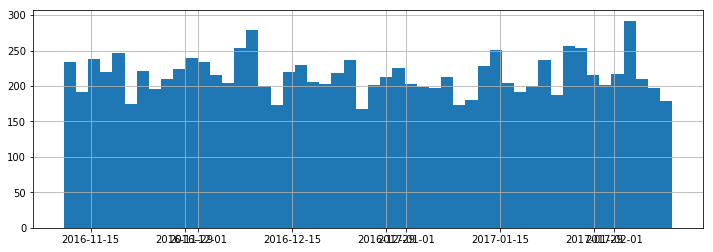

In [23]:
datef2.hist(bins=50, figsize=(12, 4))

The dates are weird, from November 2016 to February 2017. Given that they are so well spread, I will believe them :)

In [28]:
df.loc[datef2.idxmin()]

CRIME_TYPE                                         PETTY THEFT
INCIDENT_DATE                                    11/11/16 0:00
INCIDENT_UNIQUE_IDENTIFIER                           16-060900
INCIDENT_REASON                                          THEFT
LOCATION_DISTRICT                                          30X
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION    2100 CHURCH ST
LOCATION_CITY                                          Oakland
LOCATION_STATE                                              CA
Name: 1306, dtype: object

# Location

In [29]:
location = df[[c for c in df if c.startswith('LOCATION')]]
location.head()

,LOCATION_DISTRICT,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE
0,04X,1700 MARTIN LUTHER KING JR W,Oakland,CA
1,27X,1600 HIGH ST,Oakland,CA
2,08X,2800 TELEGRAPH AV,Oakland,CA
3,07X,34TH ST & LINDEN ST,Oakland,CA
4,04X,2100 SAN PABLO AV,Oakland,CA


We can use the districts directly (most cases) and, we may need to geocode to get to more precise locations. 

In [31]:
location.isnull().mean()

LOCATION_DISTRICT                               0.018293
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION    0.000000
LOCATION_CITY                                   0.000000
LOCATION_STATE                                  0.000000
dtype: float64